<a href="https://colab.research.google.com/github/arifadli/kuliahAI2021/blob/main/Logika%20Fuzzy/fuzzy%201-%20ikbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd

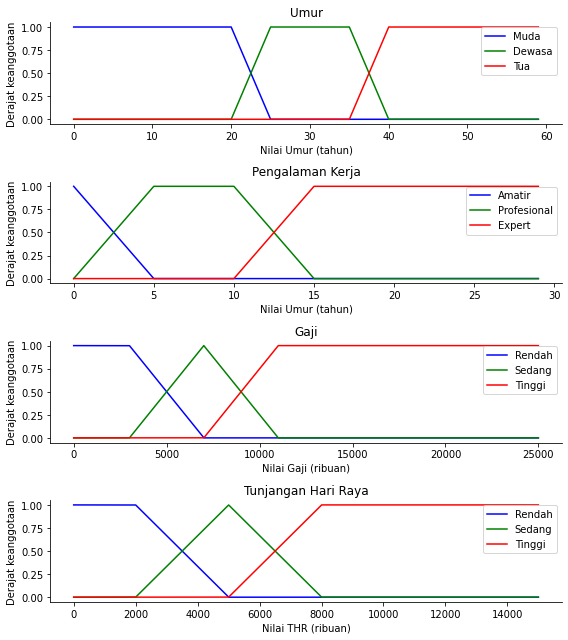

In [10]:
# Generate universe variables
x_umur = np.arange(0, 60, 1) #umur dalam tahun
x_pk = np.arange(0, 30, 1) #pengalaman kerja dalam tahun
x_gaji = np.arange (0, 25000, 1) #gaji dalam ribuan
x_thr = np.arange(0, 15000, 1) #THR dalam ribuan
 
# Generate fuzzy membership functions
umur_muda = fuzz.trapmf(x_umur, [0, 0, 20, 25])
umur_dewasa = fuzz.trapmf(x_umur, [20, 25, 35, 40])
umur_tua = fuzz.trapmf(x_umur, [35, 40, 60, 60])
pk_amatir = fuzz.trimf(x_pk, [0, 0, 5])
pk_pro = fuzz.trapmf(x_pk, [0, 5, 10, 15])
pk_expert = fuzz.trapmf(x_pk, [10, 15, 30, 30])
gaji_rn = fuzz.trapmf(x_gaji, [0, 0, 3000, 7000])
gaji_sd = fuzz.trimf(x_gaji, [3000, 7000, 11000])
gaji_tg = fuzz.trapmf(x_gaji, [7000, 11000, 25000, 25000])
thr_rn = fuzz.trapmf(x_thr, [0, 0, 2000, 5000])
thr_sd = fuzz.trimf(x_thr, [2000, 5000, 8000])
thr_tg = fuzz.trapmf(x_thr, [5000, 8000, 15000, 15000])
 
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))
 
ax0.plot(x_umur, umur_muda, 'b', linewidth=1.5, label='Muda')
ax0.plot(x_umur, umur_dewasa, 'g', linewidth=1.5, label='Dewasa')
ax0.plot(x_umur, umur_tua, 'r', linewidth=1.5, label='Tua')
ax0.set_title('Umur')
ax0.set_xlabel('Nilai Umur (tahun)')
ax0.set_ylabel('Derajat keanggotaan')
ax0.legend()
 
ax1.plot(x_pk, pk_amatir, 'b', linewidth=1.5, label='Amatir')
ax1.plot(x_pk, pk_pro, 'g', linewidth=1.5, label='Profesional')
ax1.plot(x_pk, pk_expert, 'r', linewidth=1.5, label='Expert')
ax1.set_title('Pengalaman Kerja')
ax1.set_xlabel('Nilai Umur (tahun)')
ax1.set_ylabel('Derajat keanggotaan')
ax1.legend()
 
ax2.plot(x_gaji, gaji_rn, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_gaji, gaji_sd, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_gaji, gaji_tg, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Gaji')
ax2.set_xlabel('Nilai Gaji (ribuan)')
ax2.set_ylabel('Derajat keanggotaan')
ax2.legend()

ax3.plot(x_thr, thr_rn, 'b', linewidth=1.5, label='Rendah')
ax3.plot(x_thr, thr_sd, 'g', linewidth=1.5, label='Sedang')
ax3.plot(x_thr, thr_tg, 'r', linewidth=1.5, label='Tinggi')
ax3.set_title('Tunjangan Hari Raya')
ax3.set_xlabel('Nilai THR (ribuan)')
ax3.set_ylabel('Derajat keanggotaan')
ax3.legend()
 
# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
 
plt.tight_layout()

In [22]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
umur_level_muda = fuzz.interp_membership(x_umur, umur_muda, 24)
umur_level_dewasa = fuzz.interp_membership(x_umur, umur_dewasa, 24)
umur_level_tua = fuzz.interp_membership(x_umur, umur_tua, 24)

pk_level_amatir = fuzz.interp_membership(x_pk, pk_amatir, 3)
pk_level_pro = fuzz.interp_membership(x_pk, pk_pro, 3)
pk_level_expert = fuzz.interp_membership(x_pk, pk_expert, 3)

gaji_level_rn = fuzz.interp_membership(x_gaji, gaji_rn, 5000)
gaji_level_sd = fuzz.interp_membership(x_gaji, gaji_sd, 5000)
gaji_level_tg = fuzz.interp_membership(x_gaji, gaji_tg, 5000)

In [23]:
# jika umur muda, pengalaman amatir, dan gaji rendah, maka thr rendah
active_rule1 = np.fmax(umur_level_muda,
                       np.fmax(pk_level_amatir, gaji_level_rn))
thr_activation_rn = np.fmin(active_rule1, thr_rn)  

# jika umur dewasa, pengalaman pro, dan gaji sedang,  maka thr sedang
active_rule2 = np.fmax(umur_level_dewasa,
                       np.fmax(pk_level_pro, gaji_level_sd))
thr_activation_sd = np.fmin(active_rule2, thr_sd)

# jika umur tua, pengalaman expert, dan gaji tinggi,  maka thr tinggi
active_rule3 = np.fmax(umur_level_tua, 
                       np.fmax(pk_level_expert, gaji_level_tg))
thr_activation_tg = np.fmin(active_rule3, thr_tg)
thr0 = np.zeros_like(x_thr)

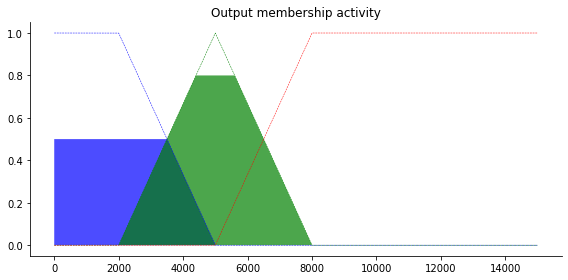

In [24]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 4))

ax0.fill_between(x_thr, thr0, thr_activation_rn, facecolor='b', alpha=0.7)
ax0.plot(x_thr, thr_rn, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_thr, thr0, thr_activation_sd, facecolor='g', alpha=0.7)
ax0.plot(x_thr, thr_sd, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_thr, thr0, thr_activation_tg, facecolor='r', alpha=0.7)
ax0.plot(x_thr, thr_tg, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


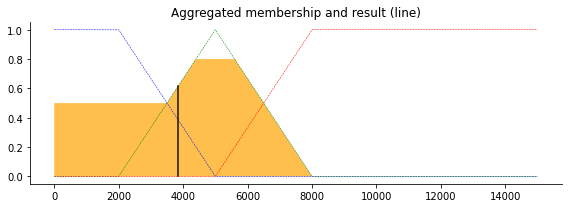

In [25]:
# Aggregate all three output membership functions together
aggregated = np.fmax(thr_activation_rn,
                     np.fmax(thr_activation_sd, thr_activation_tg))

# Calculate defuzzified result
thr = fuzz.defuzz(x_thr, aggregated, 'centroid')
thr_activation = fuzz.interp_membership(x_thr, aggregated, thr)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_thr, thr_rn, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_thr, thr_sd, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_thr, thr_tg, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_thr, thr0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([thr, thr], [0, thr_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()